In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [4]:
file = pd.read_csv(r"C:\Users\sonua\Desktop\i\mlproject\wine.csv")

In [5]:
file.head()


,Alcohol_Content,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Wine_Quality
0,9.8,6.0,0.6,0.5,18.0,0.09,18.0,95.0,1.00,3.4,0.7,5
1,11.2,12.5,0.3,0.1,9.0,0.15,14.0,120.0,1.00,3.4,0.8,6
2,10.7,7.5,0.2,0.3,14.0,0.04,22.0,110.0,1.02,3.1,0.6,7
3,11.8,9.0,0.9,0.6,4.5,0.15,28.0,160.0,1.02,3.3,0.7,6
4,12.5,11.0,0.4,0.2,3.0,0.02,16.0,140.0,1.01,3.7,0.3,4


In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol_Content       18 non-null     float64
 1   Fixed_Acidity         18 non-null     float64
 2   Volatile_Acidity      18 non-null     float64
 3   Citric_Acid           18 non-null     float64
 4   Residual_Sugar        18 non-null     float64
 5   Chlorides             18 non-null     float64
 6   Free_Sulfur_Dioxide   18 non-null     float64
 7   Total_Sulfur_Dioxide  18 non-null     float64
 8   Density               18 non-null     float64
 9   pH                    18 non-null     float64
 10  Sulphates             18 non-null     float64
 11  Wine_Quality          18 non-null     int64  
dtypes: float64(11), int64(1)
memory usage: 1.8 KB


In [7]:
file.describe()

,Alcohol_Content,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Wine_Quality
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,11.755556,8.888889,0.522222,0.455556,9.522222,0.106667,21.777778,112.222222,1.013333,3.377778,0.538889,5.888889
std,1.333823,2.368392,0.239007,0.214811,6.325816,0.040000,8.062663,36.146036,0.015718,0.251011,0.188302,1.231398
min,9.800000,6.000000,0.100000,0.100000,1.200000,0.020000,8.000000,40.000000,0.980000,3.000000,0.300000,3.000000
25%,10.725000,6.775000,0.325000,0.300000,5.625000,0.090000,16.500000,87.500000,1.002500,3.200000,0.325000,5.000000
50%,11.750000,8.250000,0.550000,0.500000,8.000000,0.100000,20.000000,110.000000,1.015000,3.350000,0.550000,6.000000
75%,12.650000,10.875000,0.700000,0.675000,13.250000,0.150000,27.500000,140.000000,1.020000,3.575000,0.700000,7.000000
max,14.500000,13.000000,0.900000,0.700000,23.000000,0.150000,38.000000,180.000000,1.040000,3.800000,0.800000,8.000000


In [8]:
file.columns

Index(['Alcohol_Content', 'Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid',
       'Residual_Sugar', 'Chlorides', 'Free_Sulfur_Dioxide',
       'Total_Sulfur_Dioxide', 'Density', 'pH', 'Sulphates', 'Wine_Quality'],
      dtype='object')

In [22]:
x = file[['Alcohol_Content', 'Fixed_Acidity',
       'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar',
       'Chlorides','Free_Sulfur_Dioxide','Total_Sulfur_Dioxide', 'Density', 'pH', 'Sulphates']]
y = file['Wine_Quality']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size=0.6)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
print(lr.intercept_)

7.072584882581436


In [27]:
coeff_ = pd.DataFrame(lr.coef_, x.columns,columns = ['Coefficients'])
coeff_

,Coefficients
Alcohol_Content,0.263640
Fixed_Acidity,-0.757716
Volatile_Acidity,0.877697
Citric_Acid,0.737893
Residual_Sugar,-0.072846
Chlorides,0.269744
Free_Sulfur_Dioxide,-0.099592
Total_Sulfur_Dioxide,0.027381
Density,0.024537
pH,-0.268956


In [28]:
pred = lr.predict(x_test)

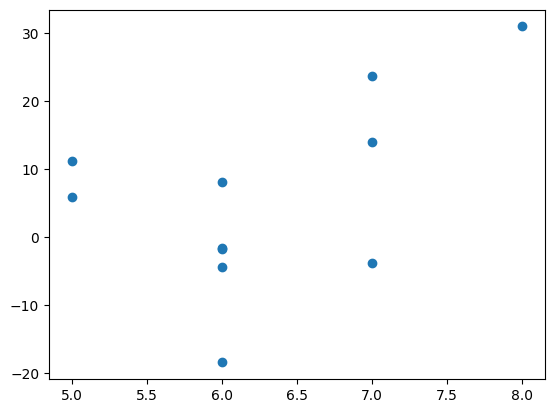

In [17]:
plt.scatter(y_test, pred)

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 10.614054392162608
MSE: 167.09772682359724
RMSE: 12.92662859463353
